In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statistics import mean
import scikitplot as skplt
from sklearn.metrics import classification_report
import warnings
df = pd.read_csv("final_Training/data_1.csv")

C:\Users\User\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df

,patient_id,swing_time_max,swing_time_min,stance_time_max,stance_time_min,stride_time_max,stride_time_min,setting_angle,mean_hs_angle,mean_to_angle,...,powerZ_ 3_C,powerZ_ 4_C,powerZ_ 5_C,powerZ_ 6_C,name,gender,leg,age,BMI,severity
0,1,1.04,0.46,1.18,0.81,1.99,1.31,71.29,24.000000,38.840000,...,533.161447,2633.837158,3055.918834,173.842186,marwa abdelaly,f,right,40,35.755956,mild
1,1,1.22,0.42,1.39,0.08,2.24,0.53,64.05,21.227143,34.982857,...,2606.851615,10.729508,5185.243035,25.271313,marwa abdelaly,f,right,40,35.755956,mild
2,1,1.01,0.42,1.01,0.23,2.02,0.65,67.16,17.451667,32.843333,...,304.164403,12119.034790,1532.932283,537.452091,marwa abdelaly,f,right,40,35.755956,mild
3,10,0.90,0.43,0.85,0.52,1.61,1.00,71.26,11.700000,27.365000,...,2954.338341,2614.545432,1978.834077,105.690189,rehab helmy,m,right,35,29.136316,normal
4,10,0.61,0.36,0.86,0.34,1.43,0.95,69.07,17.008571,28.935714,...,462.167270,1289.025156,711.321877,26.048736,rehab helmy,m,right,35,29.136316,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,8,0.70,0.47,1.15,0.82,1.85,1.31,68.90,16.812000,25.746000,...,1520.306683,1620.084514,810.152477,98.917555,sameh mostafa,m,right,43,41.207561,normal
80,8,2.39,0.52,1.38,0.59,2.98,1.36,69.19,18.786667,22.300000,...,45.824601,1505.276923,991.774908,18.398063,sameh mostafa,m,right,43,41.207561,normal
81,9,1.35,0.49,1.23,0.57,2.19,1.27,68.09,24.932000,20.004000,...,2444.744831,38.121232,1453.824808,100.249514,samia abd-allah,f,left,55,28.133657,severe
82,9,1.19,0.38,1.25,0.59,1.78,1.09,62.75,22.143333,18.550000,...,681.342965,385.500887,252.893451,112.816790,samia abd-allah,f,left,55,28.133657,severe


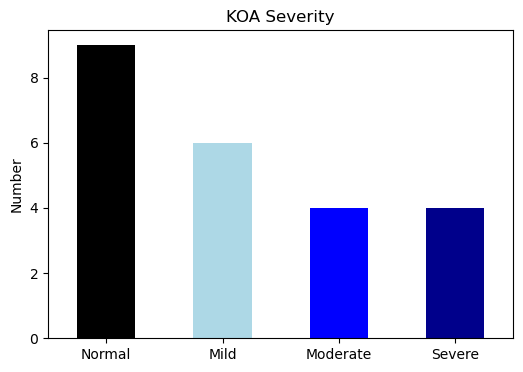

In [4]:
df_unique = df.drop_duplicates(subset='patient_id')
df_unique = df.drop_duplicates(subset='patient_id')

# Plot the severity counts
plt.figure(figsize=(6,4))
fig = df_unique['severity'].value_counts().plot(kind='bar', color=['black','lightblue','blue','darkblue'])
fig.set_xticklabels(labels=['Normal','Mild','Moderate','Severe'], rotation=0)
plt.title("KOA Severity")
plt.ylabel("Number")
plt.show()

Text(0, 0.5, 'Amount')

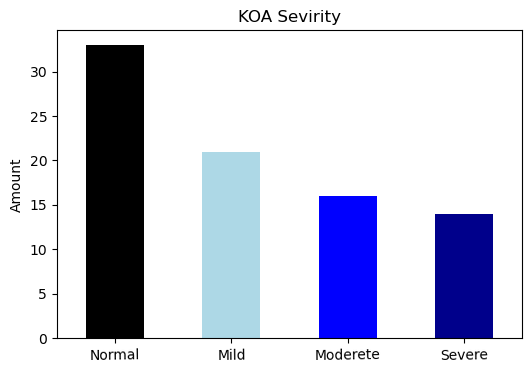

In [4]:
#plotting bar chart.
plt.figure(figsize=(6,4))
fig = df.severity.value_counts().plot(kind = 'bar', color=['black','lightblue','blue','darkblue'])
fig.set_xticklabels(labels=['Normal','Mild','Moderete','Severe'], rotation=0.9);
plt.title("KOA Sevirity")
plt.ylabel("N")

Text(0, 0.5, 'Number')

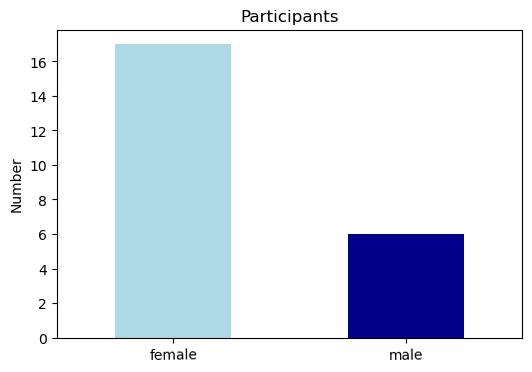

In [5]:
#plotting bar chart.
plt.figure(figsize=(6,4))
fig = df_unique.gender.value_counts().plot(kind = 'bar', color=['lightblue','darkblue'])
fig.set_xticklabels(labels=['female','male'], rotation=0.9);
plt.title("Participants")
plt.ylabel("Number")

Text(0, 0.5, 'Count')

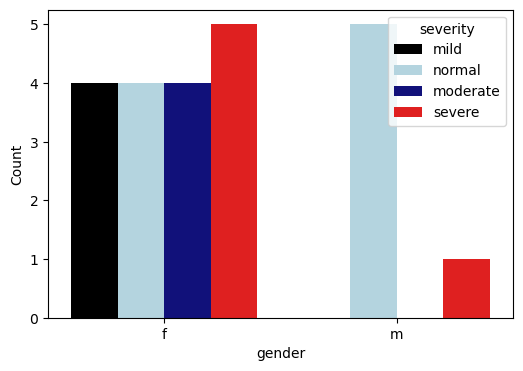

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data= df_unique, x='gender', hue= 'severity', palette= ['black','lightblue','darkblue','red'])
plt.xlabel('gender')
plt.ylabel('Count')

<Figure size 2000x1000 with 0 Axes>

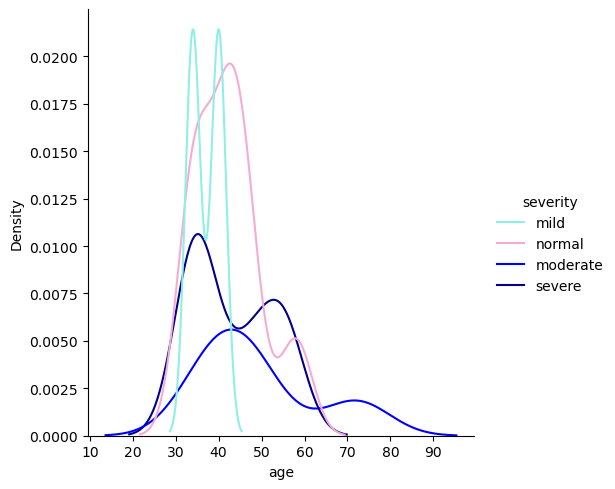

In [7]:
plt.figure(figsize=(20,10))
sns.displot(x='age', hue='severity', data=df, palette=['#8FEFE6','#F6ABD4','blue','darkblue'], kind = 'kde')

<Figure size 600x400 with 0 Axes>

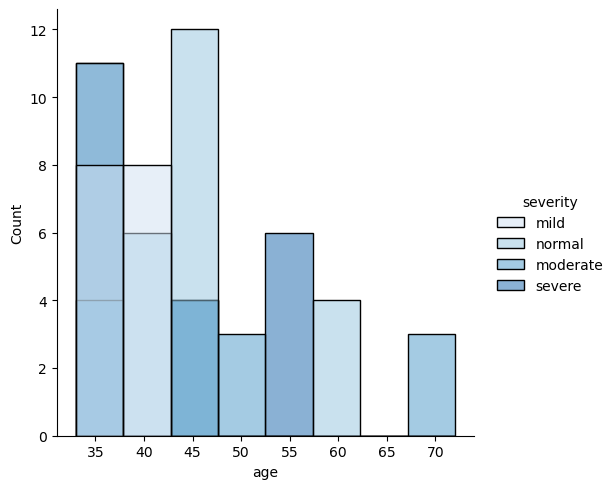

In [8]:
plt.figure(figsize=(6,4))

sns.displot(x='age', hue='severity', data=df, palette='Blues')

<Figure size 2000x1000 with 0 Axes>

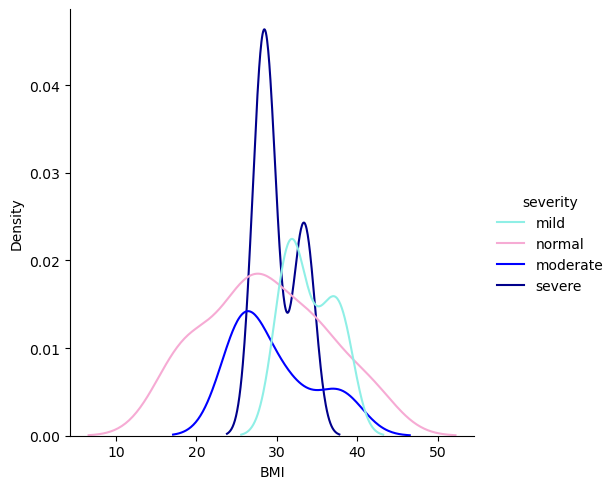

In [9]:
plt.figure(figsize=(20,10))
sns.displot(x='BMI', hue='severity', data=df, palette=['#8FEFE6','#F6ABD4','blue','darkblue'], kind = 'kde')

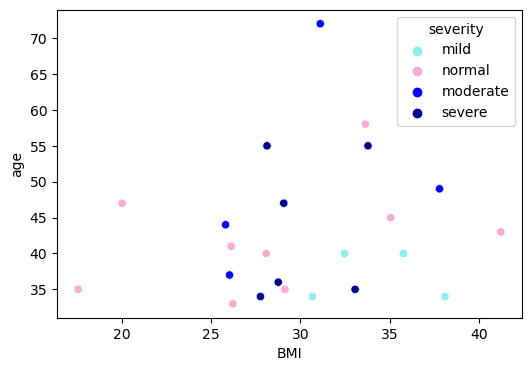

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


# Another graph: scatterplot to show relationship between BMI and age
plt.figure(figsize=(6,4))
sns.scatterplot(x='BMI', y='age', hue='severity', data=df, palette=['#8FEFE6','#F6ABD4','blue','darkblue'])

# Show plots
plt.show()


<Figure size 600x400 with 0 Axes>

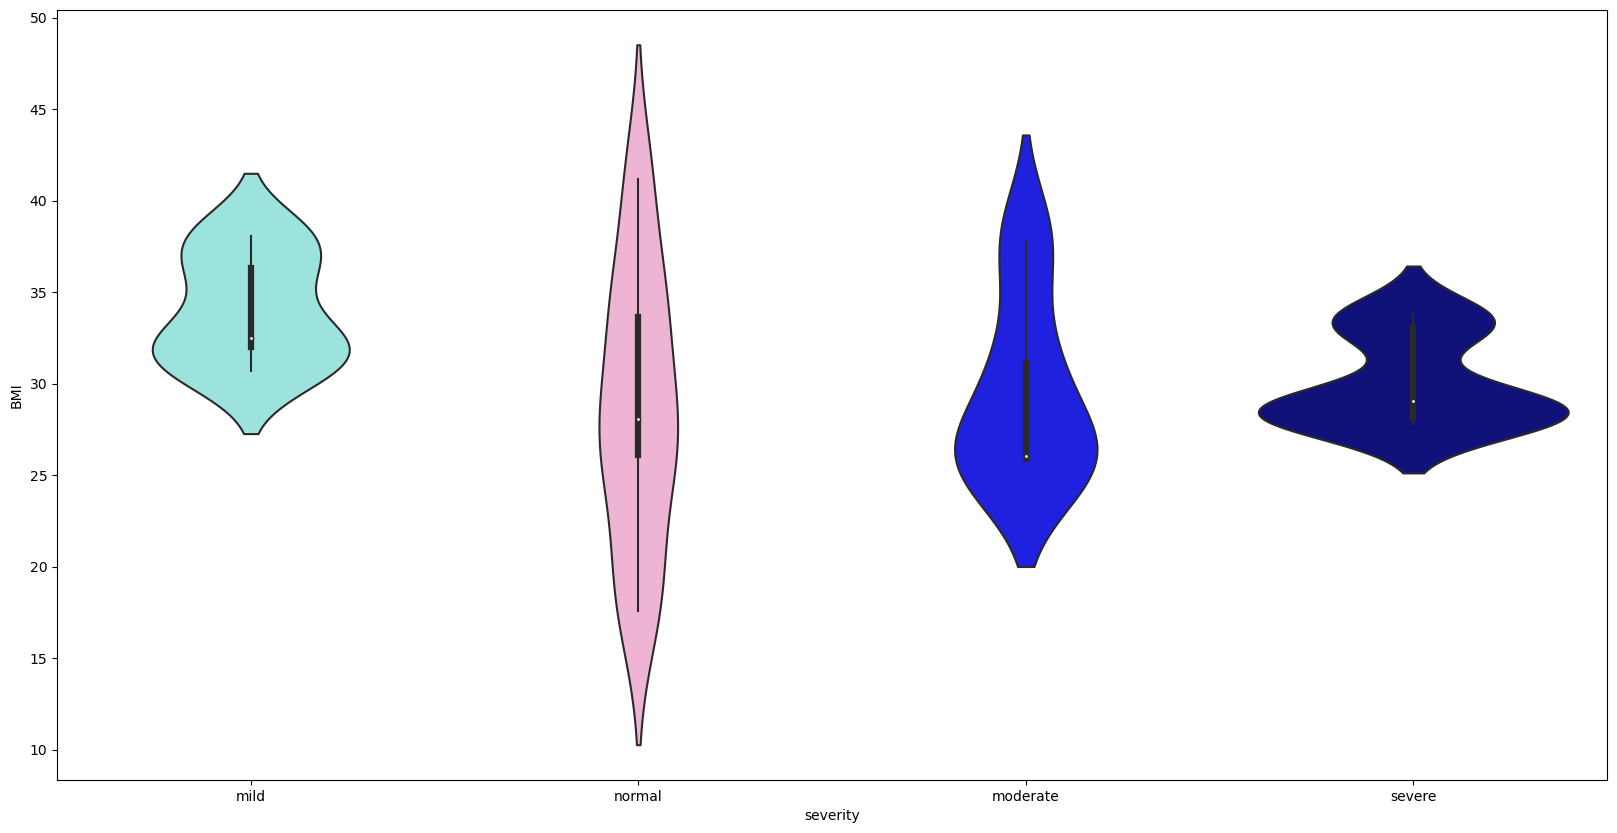

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust figure size
plt.figure(figsize=(6,4))


# Another graph: violinplot to show the distribution of BMI across different severity levels
plt.figure(figsize=(20,10))
sns.violinplot(x='severity', y='BMI', data=df, palette=['#8FEFE6','#F6ABD4','blue','darkblue'])

# Show plots
plt.show()


In [12]:
severity_order = ['Normal', 'Mild', 'Moderate', 'Severe']

In [13]:
# df_unique['severity'] = pd.Categorical(df_unique['severity'], categories=severity_order, ordered=True)
# 

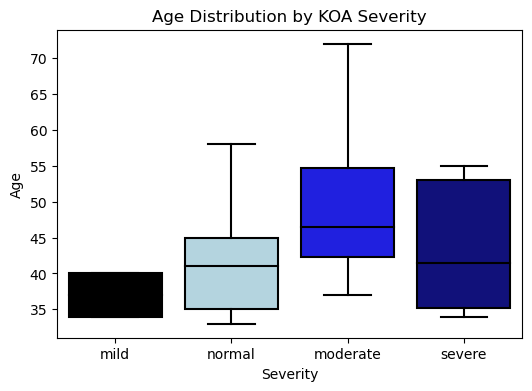

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_unique is your DataFrame and the severity column is categorical
severity_order = ['Normal', 'Mild', 'Moderate', 'Severe']

plt.figure(figsize=(6,4))
ax = sns.boxplot(x='severity', y='age', data=df_unique, palette=['black', 'lightblue', 'blue', 'darkblue'])
plt.title("Age Distribution by KOA Severity")
plt.xlabel("Severity")
plt.ylabel("Age")
plt.show()


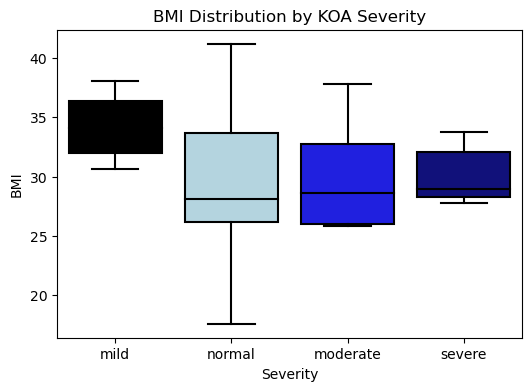

In [16]:
# Create the box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='severity', y='BMI', data=df_unique, palette=['black','lightblue','blue','darkblue'])
plt.title("BMI Distribution by KOA Severity")
plt.xlabel("Severity")
plt.ylabel("BMI")
plt.show()